<a href="https://colab.research.google.com/github/Pushkaran-P/Sampling_Techniques/blob/main/Sampling_and_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NN

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('d.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10,verbose=0)
# evaluate the keras model
_, accuracy = model.evaluate(X, y,verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 73.44


In [ ]:
predictions = model.predict_classes(X)
for i in range(6):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


The Preprocessing

In [ ]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
c=['Pregnancy','Glucose','BP','SkinThickness','Insulin','BMI','DiabetesFn','Age','Outcome']
df = pd.DataFrame(data=dataset,columns=c)

,Pregnancy,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesFn,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'No Dia'), Text(0, 0, 'Has Dia')]

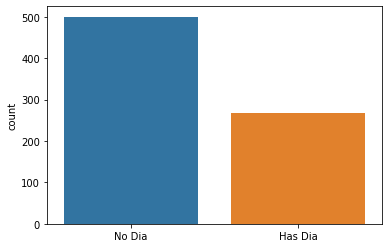

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.countplot(y)
g.set_xticklabels(['No Dia','Has Dia'])

  Dataset is clearly imbalanced

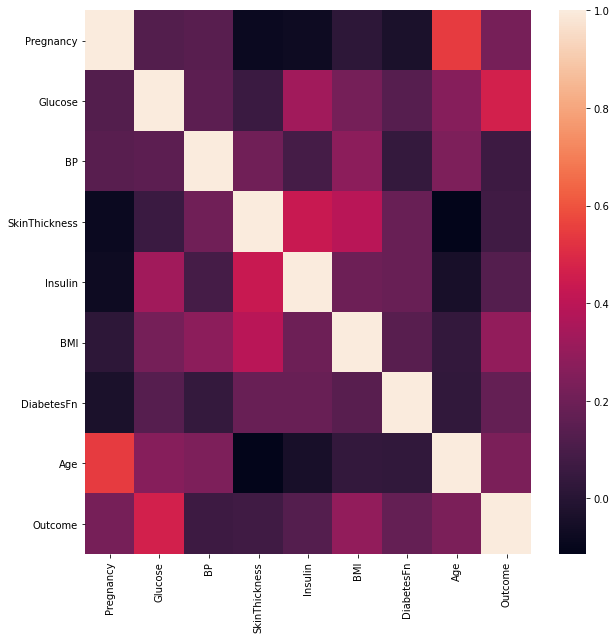

In [ ]:
dims=(10,10)
fig,ax = pyplot.subplots(figsize=dims)
g=sns.heatmap(df.corr(),ax=ax)

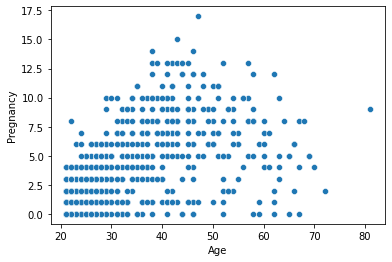

In [ ]:
g=sns.scatterplot(x='Age',y='Pregnancy',data=df)

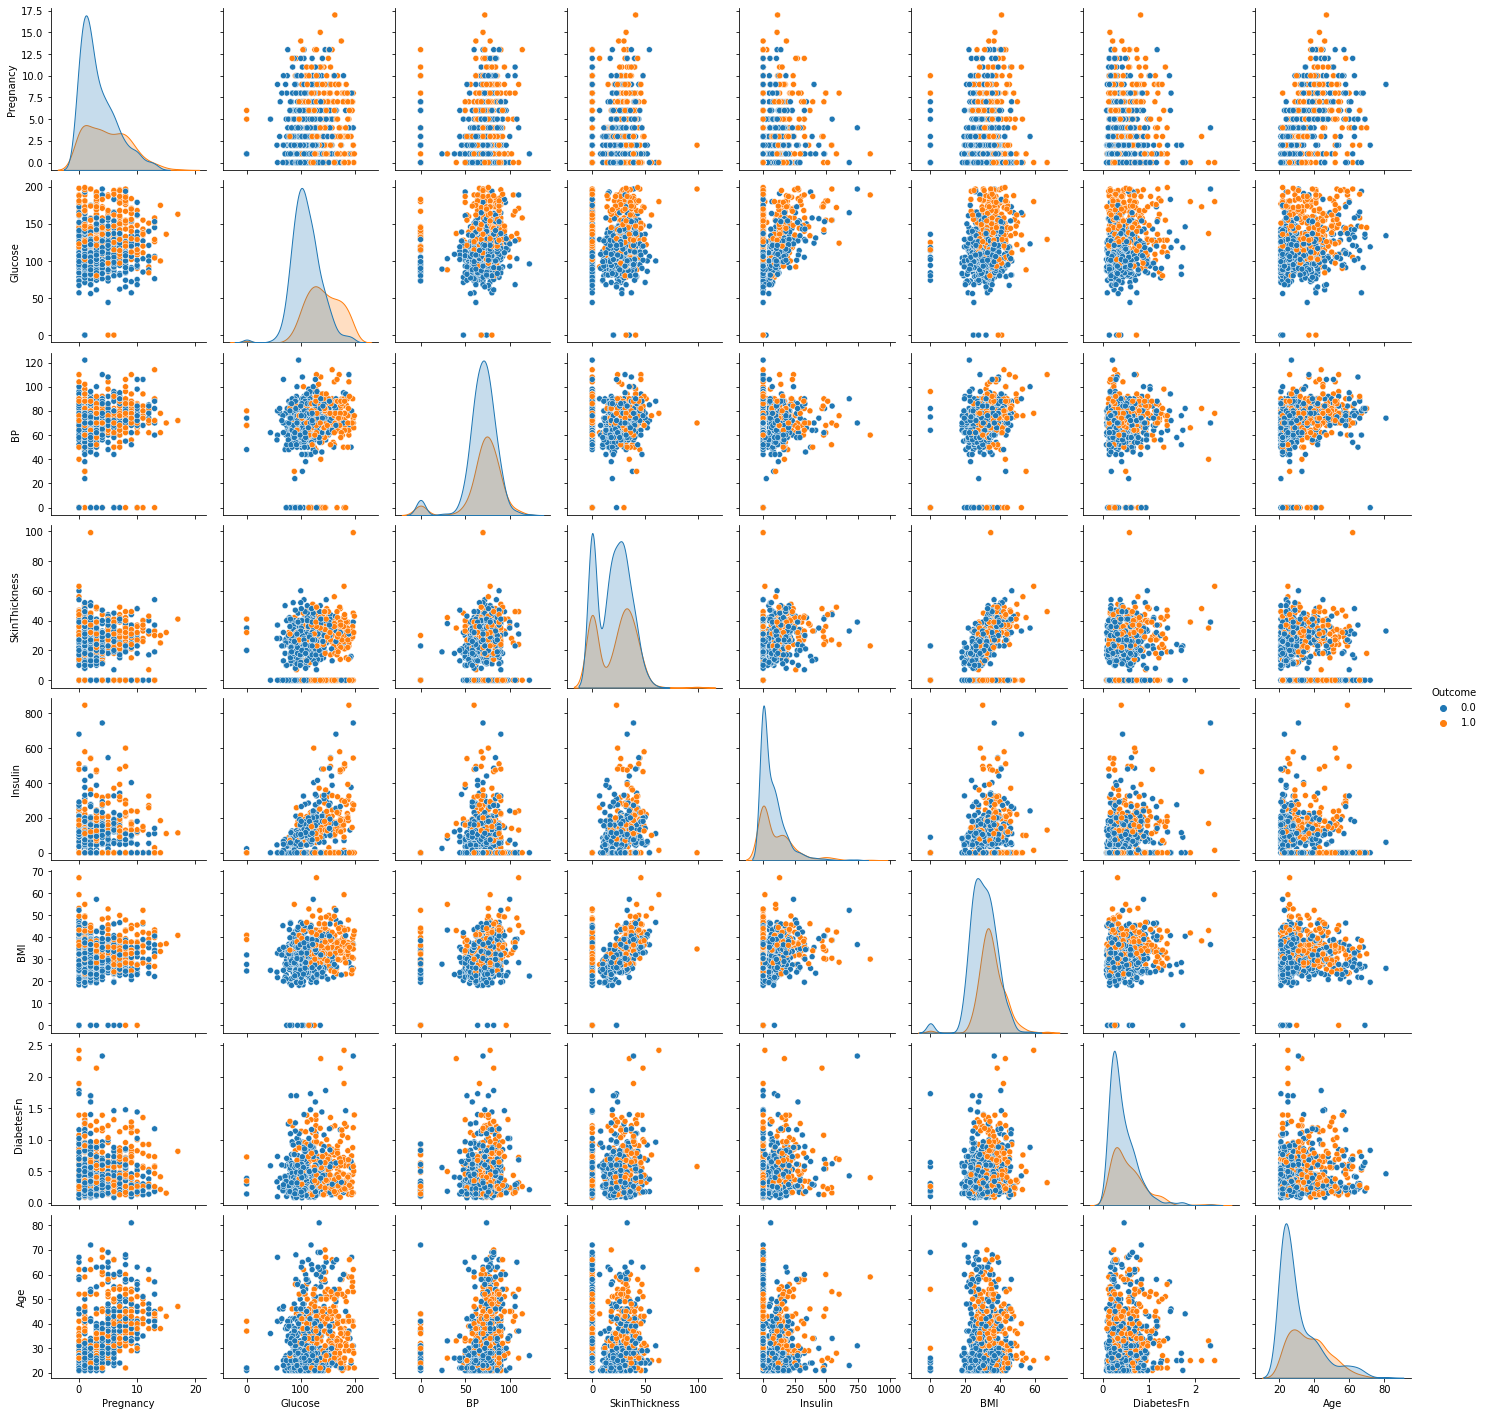

In [ ]:
sns.pairplot(df,hue="Outcome")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc01c1bfd0>,
      dtype=object)

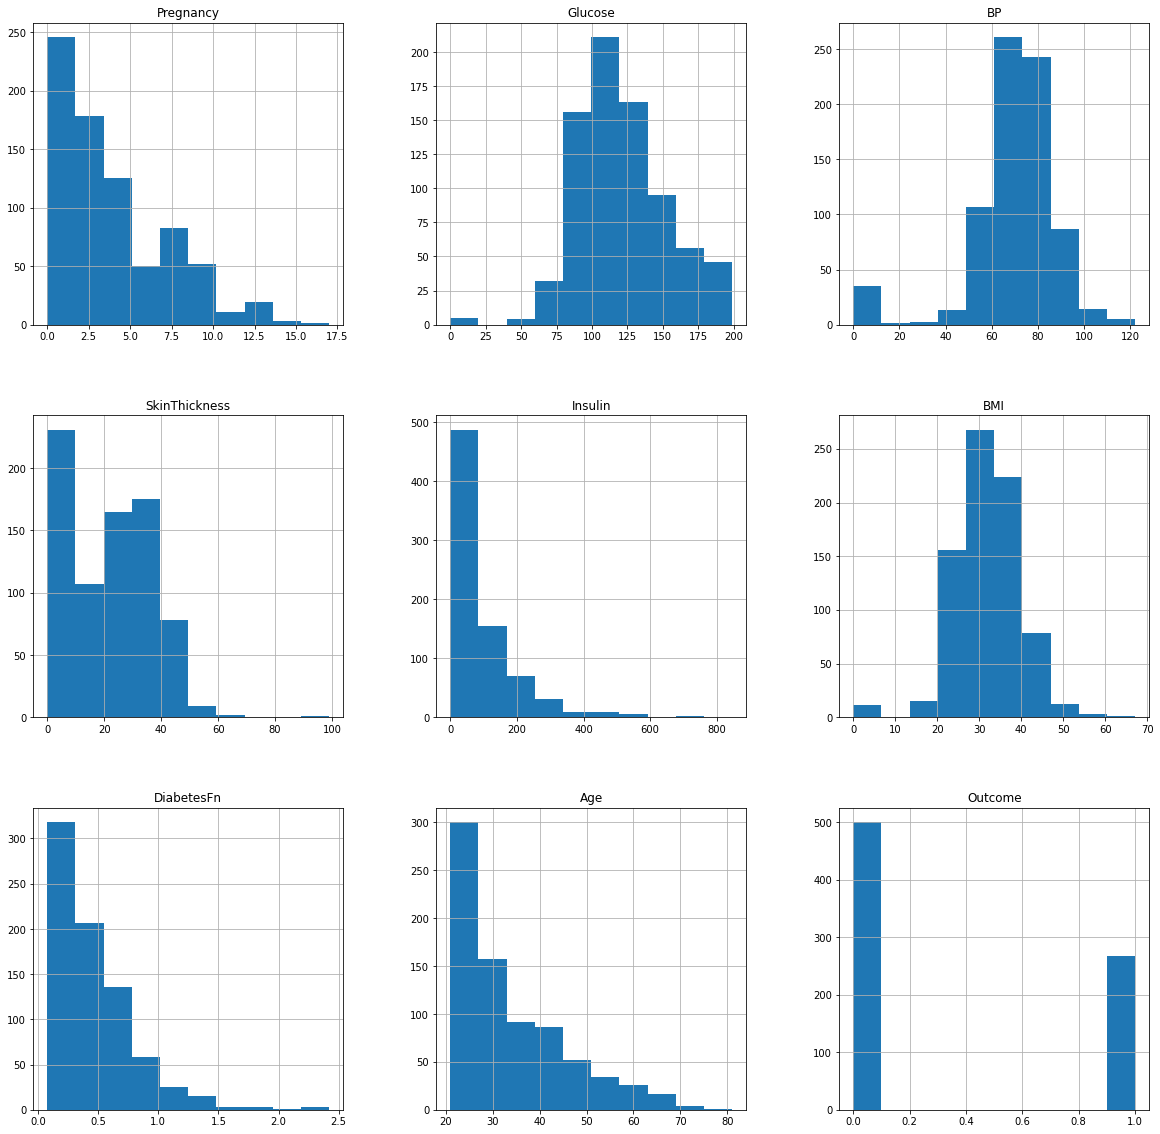

In [ ]:
df.hist(figsize=(20,20))

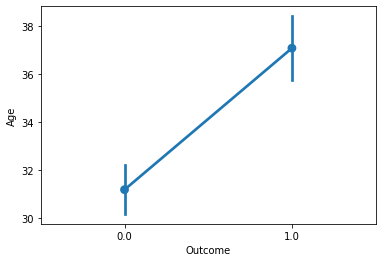

In [ ]:
sns.pointplot(x='Outcome',y='Age',data=df)

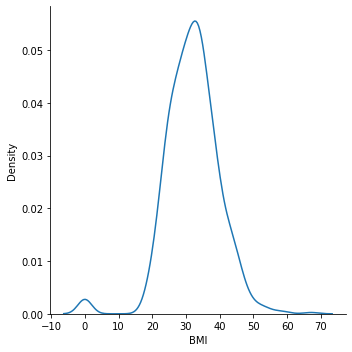

In [ ]:
sns.displot(df.BMI,kind='kde')

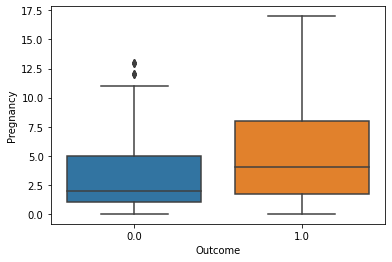

In [ ]:
sns.boxplot(x='Outcome',y='Pregnancy',data=df)

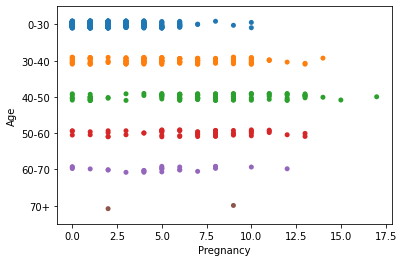

In [ ]:
sns.stripplot(x='Pregnancy',y='Age',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


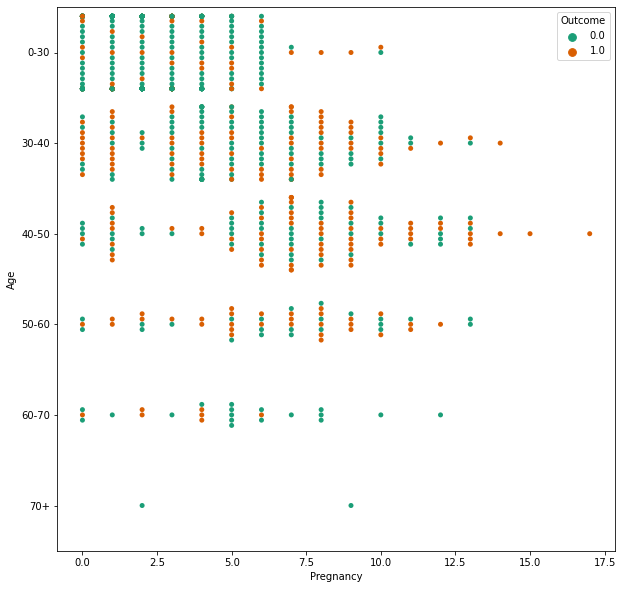

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="Pregnancy", y="Age", hue="Outcome",
              palette="Dark2", data=df)

**MODELLING**

In [ ]:
def op(X,y):
  from sklearn.preprocessing import StandardScaler
  from sklearn.model_selection import train_test_split
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.10, random_state=42)
  return X_train, X_test, y_train, y_test

In [ ]:
def cal(y_test,y_pred):
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import recall_score
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Recall:", recall_score(y_test, y_pred))
  from sklearn.metrics import roc_curve, auc
  fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
  print("AUC Score : ",auc(fpr, tpr))

Random Forest

In [ ]:
def rf(X,y):
  
  from sklearn.ensemble import RandomForestClassifier
  X_train, X_test, y_train, y_test = op(X,y)
  classifier = RandomForestClassifier(n_estimators=100,verbose=0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  cal(y_test,y_pred)

**SAMPLING** **TECHNIQUES**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler,TomekLinks,NearMiss,EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
from imblearn.combine import SMOTEENN,SMOTETomek

1. Random Under Sampling 

In [ ]:
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X, y)
rf(x_rus,y_rus)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.8518518518518519
Recall: 0.8148148148148148
AUC Score :  0.8518518518518519


2. Random Over Sampling

In [ ]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)
rf(x_ros,y_ros)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.88
Recall: 0.94


3. Under Sampling : Tomek Links

In [ ]:
tomk = TomekLinks(sampling_strategy='majority')
x_tomk, y_tomk = tomk.fit_resample(X, y)
rf(x_tomk,y_tomk)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.7638888888888888
Recall: 0.6296296296296297


4. Synthetic Minority Over Sampling Technique

In [ ]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)
rf(x_smote, y_smote)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.84
Recall: 0.88


5. Edited Nearest Neighbours

In [ ]:
enn = EditedNearestNeighbours()
x_enn, y_enn = enn.fit_resample(X, y)
rf(x_enn, y_enn)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.8431372549019608
Recall: 0.9259259259259259


6. Near Miss

In [ ]:
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, y)
rf(x_nm, y_nm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.7407407407407407
Recall: 0.7407407407407407


7. ADASYN

In [ ]:
ada = ADASYN()
x_ada, y_ada = ada.fit_resample(X, y)
rf(x_ada, y_ada)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.8469387755102041
Recall: 0.875


8. SOMTE+Tomek

In [ ]:
stm=SMOTETomek()
x_stm,y_stm = stm.fit_resample(X,y)
rf(x_stm,y_stm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.8617021276595744
Recall: 0.8723404255319149


9. SOMTE+ENN

In [ ]:
sen=SMOTEENN()
x_sen,y_sen = sen.fit_resample(X,y)
rf(x_sen,y_sen)

Accuracy: 0.9622641509433962
Recall: 0.9666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

**REFERENCES FOR SAMPLING**
  
  
  https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
  https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
  https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

**REFERENCES FOR ENSEMBLE MODELS**

  https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c
  
  https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/